# IC 720 with TheOG.

**Set your starting options here:**
* nick: Nickname that will appear in saved files.
* file: Saved and working location.
* path: The path from TheOG to the data file.
* sci: Location of the science image (index). Typically 0 or 1.
* need_cutout: If the target is very small within the original image, you may want to use a smaller cutout of the image.
* pos,size: if need_cutout=True, then specific approximate center (x,y) of area of interest, and size of desired cutout (px).

(Python 3.12.3)

In [2]:
sci = 0
need_cutout = True

nick = 'ic_720'                     # nickname applied to file names
file = 'ic_720_output/ic_720'       # saved and working location. Includes the nickname.
path = 'mw_compare_data/ic720.fits' # path to original data
pos,size = (2210,3398),(2000, 2000)

## Imports

In [3]:
import TheOG.rotate_tools as og

from astropy.io import fits
from astropy.wcs import WCS
from astropy.stats import SigmaClip # class
from astropy.stats import sigma_clip
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.visualization import ZScaleInterval

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 10
rcParams['savefig.bbox'] = 'tight'
rcParams['image.origin'] = 'lower'
rcParams['image.cmap'] = 'Greys_r'
%matplotlib inline

from photutils.background import Background2D, MedianBackground

%load_ext autoreload
%autoreload 2

## Open FITS and Get Info

In [4]:
# Note: variables with 0 at the end indicate the original file. All others will refer to the cutout file
hdulist0 = fits.open(path)
hdulist0.info()

Filename: mw_compare_data/ic720.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     357   (4220, 4300)   float32   


In [5]:
# get the header info (cards) of the science frame
prihdr0 = hdulist0[sci].header
print(repr(prihdr0))

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 4220 / Axis length                                    
NAXIS2  =                 4300 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2021-03-14T14:05:39' / Date FITS file was generated                  
IRAF-TLM= '2021-03-14T14:05:36' / Time of last modification                     
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'ACS   '             / identifier for instrument used to acquire data 
                            

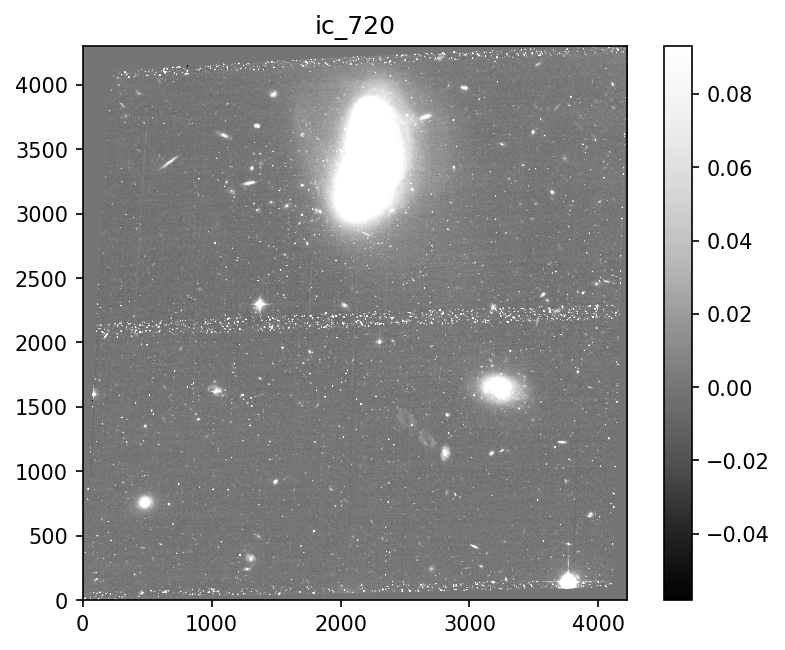

In [6]:

# define the image data
image_data0 = hdulist0[sci].data

# find if the data is 2D or 3D. If 3D, work with the zero index of the image data
if len(image_data0.shape) > 2:
    image_data0 = image_data0[0]

interval = ZScaleInterval()
(imin,imax) = interval.get_limits(image_data0)
plt.imshow(image_data0, vmin=imin,vmax=imax)
plt.title(nick)
plt.colorbar()
plt.show()

## Make a Cutout

First, make a WCS variable using the header that goes with image_data (hdulist[1].header)

In [7]:
print(type(image_data0))

wcs = WCS(prihdr0)
print(wcs)
print(type(wcs))

<class 'numpy.ndarray'>
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : np.float64(175.5952866958183) np.float64(8.784755980414397) 
CRPIX : np.float64(2110.0) np.float64(2150.0) 
CD1_1 CD1_2  : np.float64(1.35476835715744e-05) np.float64(-3.059657564564e-06) 
CD2_1 CD2_2  : np.float64(-3.059657564564e-06) np.float64(-1.3547683571574e-05) 
NAXIS : 4220  4300
<class 'astropy.wcs.wcs.WCS'>


Create a cutout of the image cuting Cutout2D. Set the wcs to the variable above, so that the cutout retains its header data, and transforms it according the cutout used. This is done in order to use the save_cutout function from TheOG. **Decide settings in the starting options box.**

In [8]:
#this will make a smaller cutout if needed, if not, it will make a copy of the file to work with in the next cell.
try:
    if need_cutout == True:
        position = pos  # approximate center (x,y) of area of interest
        size = size     # size of desired cutout (px)
        cutout = Cutout2D(image_data0, position, size, wcs=wcs)
        og.save_cutout(path, sci, cutout, file+'.fits') # writes to a new file
        hdulist0.close() #closes original
    else:
        cutout = image_data0
except:
    print('Cannot make a smaller cutout. Perhaps it already exists, and is being used by another preocess.')
    print('Close ds9 and restart kernal to update cutout.')
    print('Continuing to next step...')

Cannot make a smaller cutout. Perhaps it already exists, and is being used by another preocess.
Close ds9 and restart kernal to update cutout.
Continuing to next step...


In [9]:
# redefine variables to use the cutout fits
# variables with 0 at the end indicate the original file. All others will refer to the cutout file

if need_cutout == True:
    hdulist = fits.open(file+'.fits')
    print(hdulist.info())

    prihdr = hdulist[sci].header
    print(repr(prihdr))
else:
    hdulist = hdulist0
    # prihdr = prihdr0
    hdulist.writeto(file+'.fits', overwrite=True)
    hdulist0.close()
    hdulist = fits.open(file+'.fits')
    prihdr = hdulist[sci].header

image_data = hdulist[sci].data
print(image_data.shape)

Filename: ic_720_output/ic_720.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     357   (2000, 1902)   float32   
None
SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2000 / Axis length                                    
NAXIS2  =                 1902 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2021-03-14T14:05:39' / Date FITS file was generated                  
IRAF-TLM= '2021-03-14T14:05:36' / Time of last modification                     
                                                                                
TELESCOP= 'HST'    

## DS9 Regions and Ellipses

Use DS9 to create a region of each galaxy. TheOG will create the .reg file to use.

In [10]:
og.drawregions(fitsfile=file+'.fits', science=sci)

data shape:	 (1902, 2000)

Please open DS9 with the newly generated .reg file and move
the x to the forground galaxy center, 
the + to the background galaxy center, 
the blue ellipse to encompass the foreground galaxy, and
the red ellipse to encompass the background galaxy.

WHEN SAVING, OPT FOR IMAGE so everything is in PIXELS for TheOG to deal with.
Best practice is to make a separate .reg file in WCS.


TIPS: 
* If you use a cutout, make sure to make the regions on the cutout fits file instead of the original.
* Use a scale to that is easy to identify the centers of the galaxies, and place the center markers.
* The closer the markers are to the center, the better the transmission plots will be.
* Use the information panels to set the elipses at the same position as the markers.
* Encompass the entire visible region of the galaxy when viewed in ZScale.
* Regions should be overlapping.
* Save the region with IMAGE coordinate system.
* Specify the file extension .reg to avoid errors.

Name the file 'nick_regions.reg', using the chosen nickname. Add '_regions' to the name so running og.drawregions again doesn't overwrite the file.

In [11]:
x0_fg,y0_fg,a_fg,b_fg,pa_fg, x0_bg,y0_bg,a_bg,b_bg,pa_bg  = og.readregion(file+'_regions.reg')

print(x0_fg,y0_fg,a_fg,b_fg,pa_fg, x0_bg,y0_bg,a_bg,b_bg,pa_bg)

# Region file format: DS9 version 4.1

global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1

image

point(981.40924,835.05118) # point=x 15 color=red text={BG center}

Found the background galaxy center marker!
981.40924 835.05118
point(1038.2624,1144.9215) # point=cross 15 color=blue text={FG center}

Found the foreground galaxy center marker!
1038.2624 1144.9215
ellipse(1038.2621,1144.9129,337.72221,272.31858,89.999997) # color=blue

Found the foreground galaxy ellipse!
1038.2621 1144.9129 337.72221 272.31858 89.999997 

ellipse(981.41331,835.04407,176.64279,184.61946,348.88909) # color=red

Found the background galaxy ellipse!
981.41331 835.04407 176.64279 184.61946 348.88909 

1038.2624 1144.9215 337.72221 272.31858 89.999997 981.40924 835.05118 176.64279 184.61946 348.88909


In [12]:
plt.get_scale_names()

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']

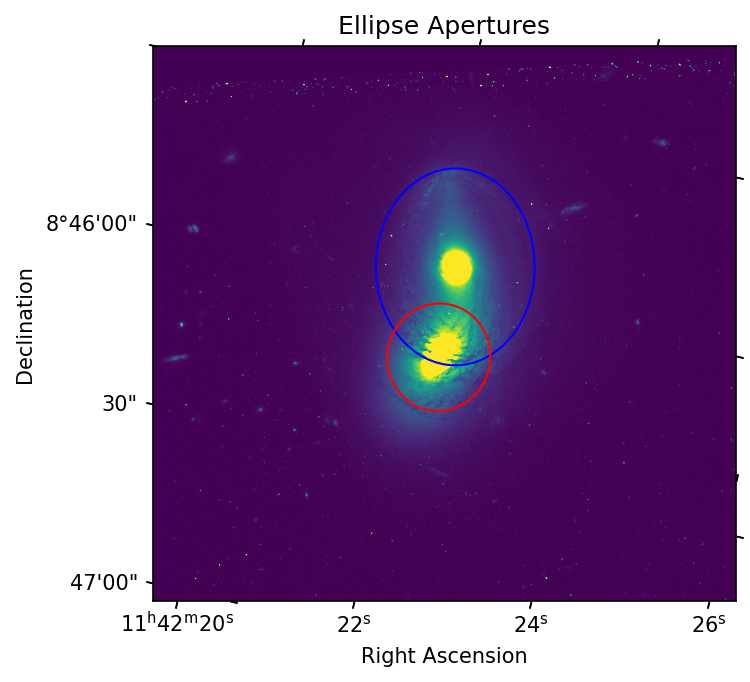

In [13]:
#defining aperture collections:
aper_fg = (x0_fg,y0_fg,a_fg,b_fg,pa_fg)
aper_bg = (x0_bg,y0_bg,a_bg,b_bg,pa_bg)

og.plot_ellipses(image_data, prihdr, aper_fg, aper_bg, figname=file+'_elip_aper.png', ZScale=False, label=False) #labels positions are currently set in Image_tools

## Rotation Method

The simplest method is to rotate both galaxies around their respective centers. Enter the size of the postage stamp cutout within dimen=u.Quantity((y, x), u.arcmin). Stamp size may be a rectangle if rotating by 180 degrees.

Postage stamp cutout should encompass the entirety of boths galaxies when rotated. Initial cutout size can be increased to fix potential issues.


input position (x,y) in px:	 1038.2624, 1144.9215
input position (ra,dec) in deg:	 175.59288035144218, 8.765445470873772

original position:	 (1038, 1145)
original shape:		 (1902, 2000)
cutout shape:		 (6000, 6000)
cutout corners:		 x:(-1962, 4038), y:(-1855, 4145) 


input position (x,y) in px:	 981.40924, 835.05118
input position (ra,dec) in deg:	 175.593060295597, 8.769817447818275

original position:	 (981, 835)
original shape:		 (1902, 2000)
cutout shape:		 (6000, 6000)
cutout corners:		 x:(-2019, 3981), y:(-2165, 3835) 



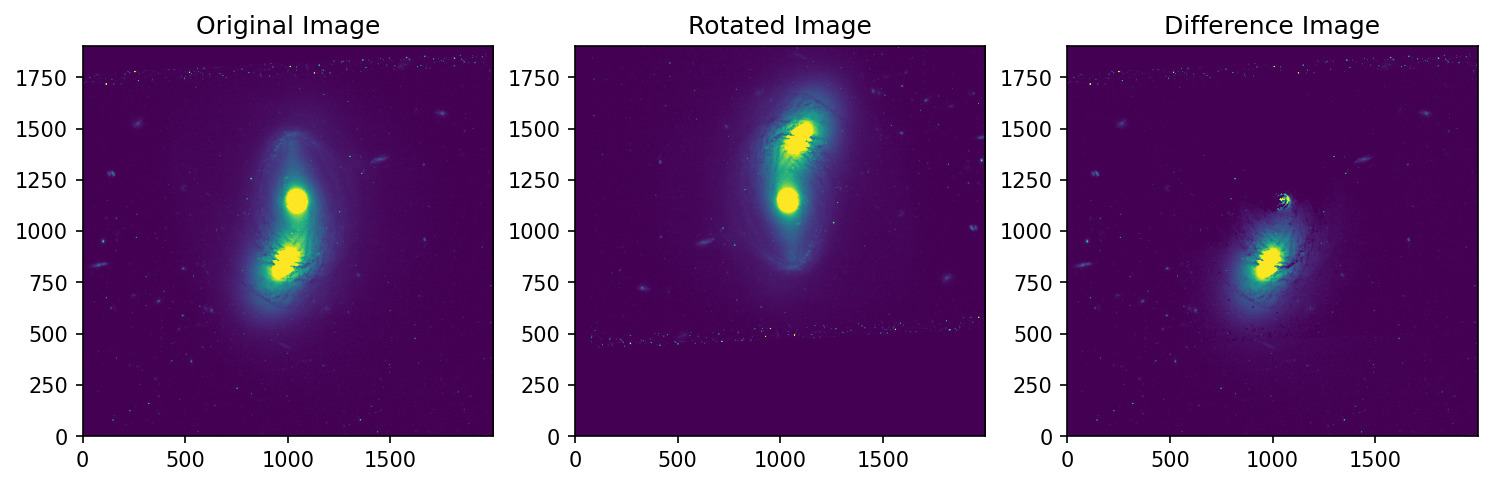

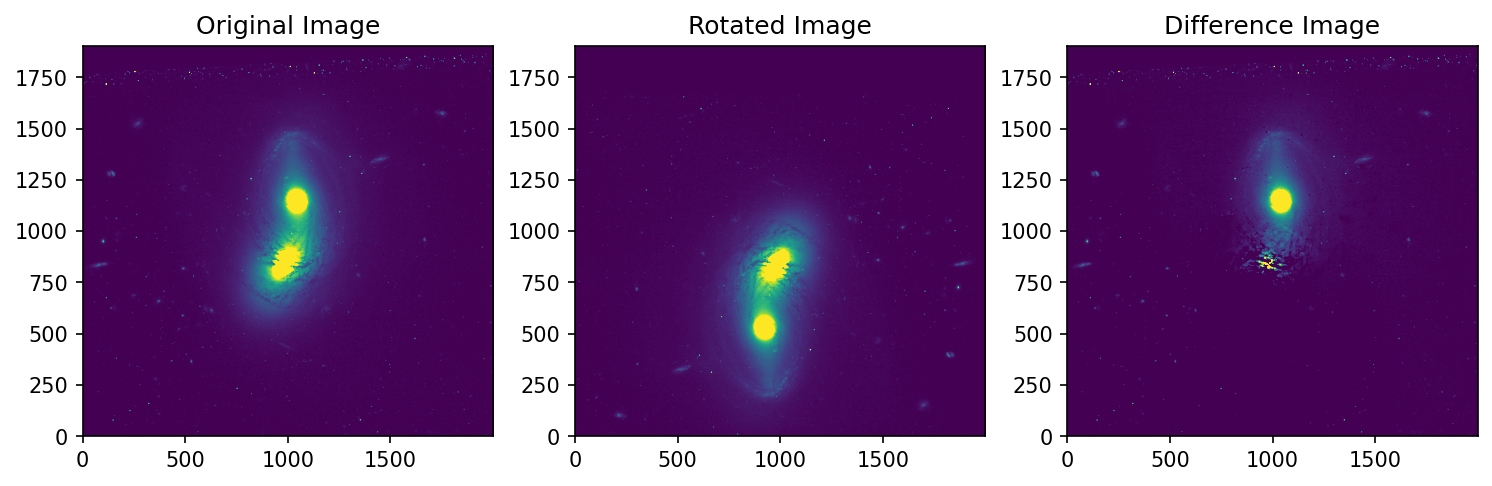

In [14]:
# Note: With JWST images, 'WARNING: FITSFixedWarning' shows up. This is suppressed in Image_tools.

# foreground
fg_rot_model = og.imrotate(data=image_data,header=prihdr, x0=x0_fg, y0=y0_fg, dimen=u.Quantity((5, 5), u.arcmin), rotangle=180.,  
                           figname=file+'_foreground_rotated.png',ZScale=False)

# background
bg_rot_model = og.imrotate(data=image_data,header=prihdr, x0=x0_bg, y0=y0_bg, dimen=u.Quantity((5, 5), u.arcmin), rotangle=180.,  
                           figname=file+'_background_rotated.png',ZScale=False)

Try jiggle and rotate to get a better center of the region.
* This function takes much longer to run (2-10 mins), so choose the pixel range and pixel steps carefully.
* Manual:
    * Look at your image, and choose a distance from your center point where you think the best center is located (pixrange).
    * Then choose how many steps within the range you want to check for a better center (pixelstep.)
* Automatic:
    * Open ds9 and the nick_regions.reg file created earlier. Adjust ellipses to suround the area where you beleive the best center is located.
    * Do not change the centers of the regions, as the code won't recognize the change # this could easily be changed later if I wanted
    * Adding the .reg file will make the function run on automatic mode, leaving pixrange and pixelstep manual values to be ignored.
* The best change in the center is returned, along with plots of the best images.

In [15]:
# foreground rough (no fine tuning)
# fg_dx, fg_dy = og.jiggle_and_rotate(data=image_data,header=prihdr,x0=x0_fg,y0=y0_fg,pixrange=20,pixelstep=4,figname=file+'_fg_jiggle.png', 
#                                             regfile=file+'_center_regions.reg', foreground=True)
# print(fg_dx,fg_dy)

In [16]:
# now, using finetune to check around the new best point

# fg_dx, fg_dy = og.jiggle_and_rotate(data=image_data,header=prihdr,x0=x0_fg+fg_dx,y0=y0_fg+fg_dy,pixrange=20,pixelstep=4,figname=file+'_fg_jiggle.png', 
#                                             regfile=file+'_center_regions.reg', foreground=True, finetune=True)
# print(fg_dx,fg_dy)

In [17]:
# background rough (no fine tuning)

# bg_dx, bg_dy = og.jiggle_and_rotate(data=image_data,header=prihdr,x0=x0_bg,y0=y0_bg,pixrange=10,pixelstep=1,figname=nick+'_bg_jiggle.png',
#                                     regfile=file+'_center_regions.reg', foreground=False)
# print(bg_dx,bg_dy)

In [18]:
# now, using finetune to check around the new best point

# bg_dx, bg_dy = og.jiggle_and_rotate(data=image_data,header=prihdr,x0=x0_bg+bg_dx,y0=y0_bg+bg_dy,pixrange=20,pixelstep=4,figname=file+'_bg_jiggle.png', 
#                                             regfile=file+'_center_regions.reg', foreground=True, finetune=True)
# print(fg_dx,fg_dy)

If jiggle_and_rotate gave desirable results, add the change here:

In [19]:
# x0_fg_old = x0_fg
# y0_fg_old = y0_fg

# x0_fg = x0_fg + fg_dx
# y0_fg = y0_fg + fg_dy

# x0_bg_old = x0_bg
# y0_bg_old = y0_bg

# x0_bg = x0_bg + bg_dx
# y0_bg = y0_bg + bg_dy

## (Mask Testing)

In [20]:
# print(np.min(image_data), np.max(image_data))

# image_data_norm = normalize(image_data, 0, 1)

# print(np.min(image_data_norm), np.max(image_data_norm))
# print(np.average(image_data_norm))

In [21]:
# e = og.mkellipsemask(image_data_norm,aper_fg)
# e = np.abs(e-1)
# print(np.min(e), np.max(e))

# masked = image_data_norm - e
# print(np.min(masked), np.max(masked))

# masked[masked < 0.] = 0
# print(np.min(masked), np.max(masked))

# fig, ax = plt.subplots(1, 1)
# im = ax.imshow(masked, origin='lower', interpolation='none', cmap='Greys_r')
# fig.colorbar(im)
# plt.show()

## Sky Estimates

0.0006250053332886948 0.0006250053332886948


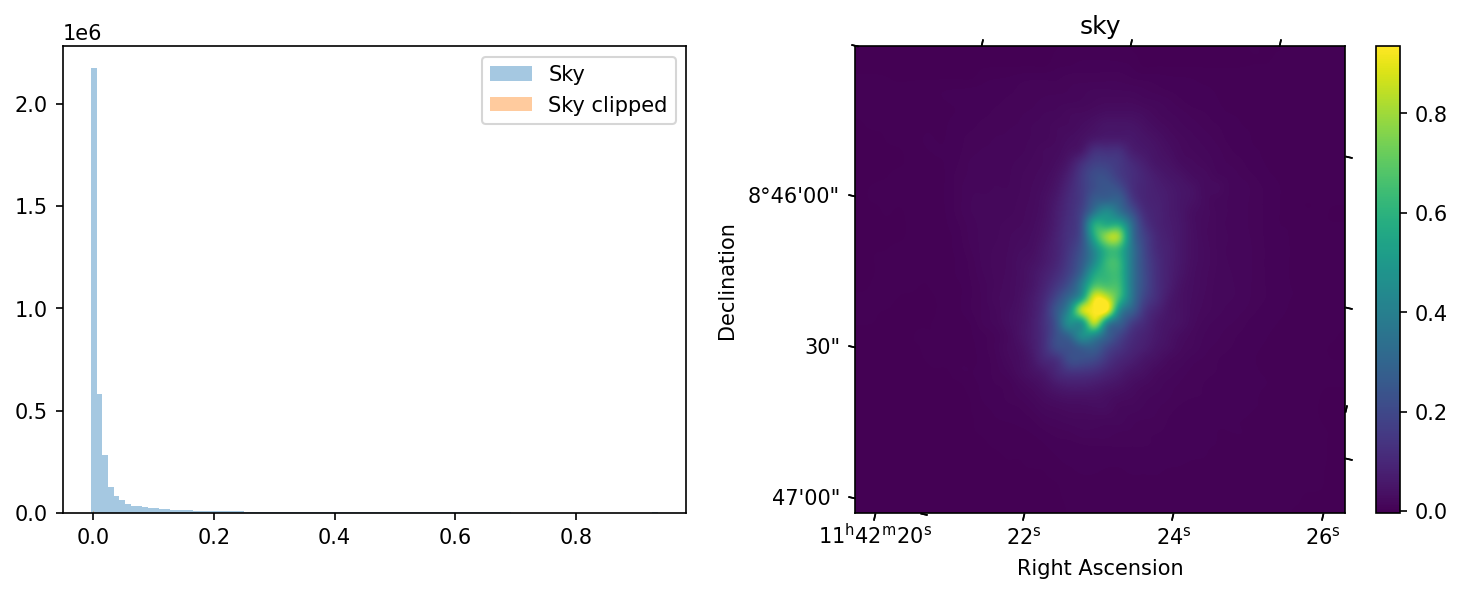

In [22]:
# get background
sky = og.background(image_data)


plt.figure(figsize=(10,4))

# clip extra
sky_clip = sigma_clip(sky.background, sigma=1.8, maxiters=None, cenfunc='mean', masked=False, copy=False)
plt.subplot(1, 2, 1)
plt.hist(np.ravel(sky.background), bins=100,
        #  range=[-0.02,0.02],
         alpha=0.4,density=False,label='Sky');
plt.hist(np.ravel(sky_clip), bins=100,
        #  range=[-0.02,0.02],
         alpha=0.4,density=False,label='Sky clipped');
plt.legend()
print(np.std(np.ravel(sky_clip)),np.std(np.ravel(sky_clip)))

# graph the background data
ax3 = plt.subplot(1, 2, 2, projection=WCS(prihdr))
s = ax3.imshow(sky.background, origin='lower', cmap='viridis')
plt.colorbar(s)
ax3.coords['ra'].set_axislabel('Right Ascension')
ax3.coords['dec'].set_axislabel('Declination')
ax3.set_title('sky')

plt.tight_layout()

In [23]:
print(np.min(image_data))
print(np.max(image_data))
print(np.min(sky.background))
print(np.max(sky.background))
print(np.min(sky_clip))
print(np.max(sky_clip))

-0.744166
49.598682
-0.0031361915171146393
0.9351529777050018
-0.000302310761442705
0.0019476868485292966


## Transmission Map

We now make the simplest transmission map using the rotated images.

The uncertainty map still needs the uncertainty in the background.

### Uncertainties
(Taken from tutorial 1)

In the overlap region, one measures the uncertainty in the Transmission (T) from the flux in the overlap (I), the rotated foreground image (F') and background galaxy image (B') from the expression for the transmission:

$$ T = {I- F'\over B'} $$

The uncertainty in the transmission can be derived from:

$$    \Delta T^2  =  \left(\partial T \over \partial I \right)^2 \Delta I^2 + \left(\partial T \over \partial F' \right)^2 \Delta F'^2 + \left(\partial T \over \partial B' \right)^2 \Delta B'^2 $$

which becomes: 

$$    \Delta T^2   = \left(\Delta I \over B' \right)^2 + \left(\Delta F_{tot} \over B' \right)^2 + \left(\Delta B' \over B'^2 \right)^2 $$

where $\Delta I$, $\Delta F$, and $\Delta B$ are the uncertainties in the overlap, foreground and background galaxy contributions respectively. 

Note that errors in the background galaxy uncertainty contribution drops more rapidly with a brighter background galaxy. 

To estimate the uncertainty in the foreground and background galaxy we:

   * Identify the foreground and background galaxy's centers and approximate radius visually.
   * Rotate the image around the background galaxy's center and subtract the rotated image to generate a ``foreground only" image
   * Fit an isophotal model to this foreground only image. 
   * Sigma clip the foreground galaxy area pixel collection until a Gaussian distribution remains (all the optical depth signal has been removed) and determine the rms value.
   * Repeat the rotate-subtract-model-clip steps for the background galaxy to obtain an estimate of the background galaxy uncertainty. 



In [25]:
plt.get_scale_names()

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']

c:\Users\dogfi\Documents\Research\OAKS\Python\OverlappingGalaxies\TheOG\rotate_tools.py:684: RuntimeWarning: overflow encountered in divide
  trans = (data-fg)/bg


Aperture Growth Factor:	 2.0
Foreground	 major axis:	 337.72221	 minor axis:	272.31858
Background	 major axis:	 176.64279	 minor axis:	184.61946


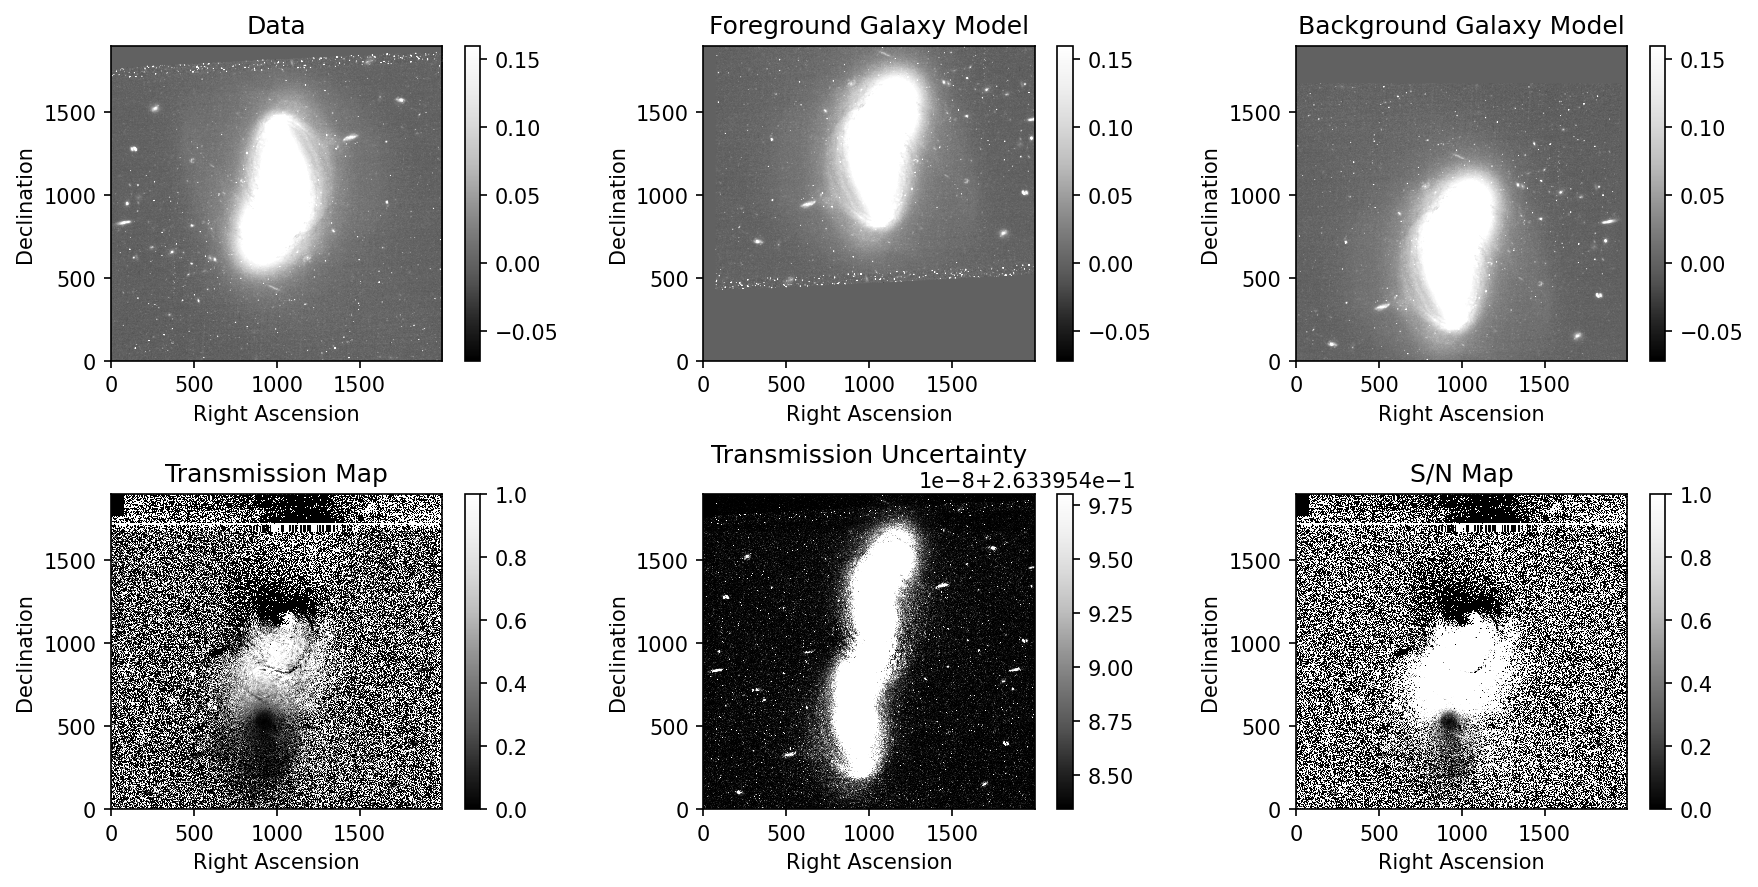

In [26]:
aper_fg = (x0_fg,y0_fg,a_fg,b_fg,pa_fg)
aper_bg = (x0_bg,y0_bg,a_bg,b_bg,pa_bg)

trans,sn_trans,DTmap = og.transmission(image_data, prihdr, fg_rot_model.data, bg_rot_model.data, aper_fg, aper_bg,figname=file+'_transmission',
                                       ZScale=True, celestial=False, norm='linear')

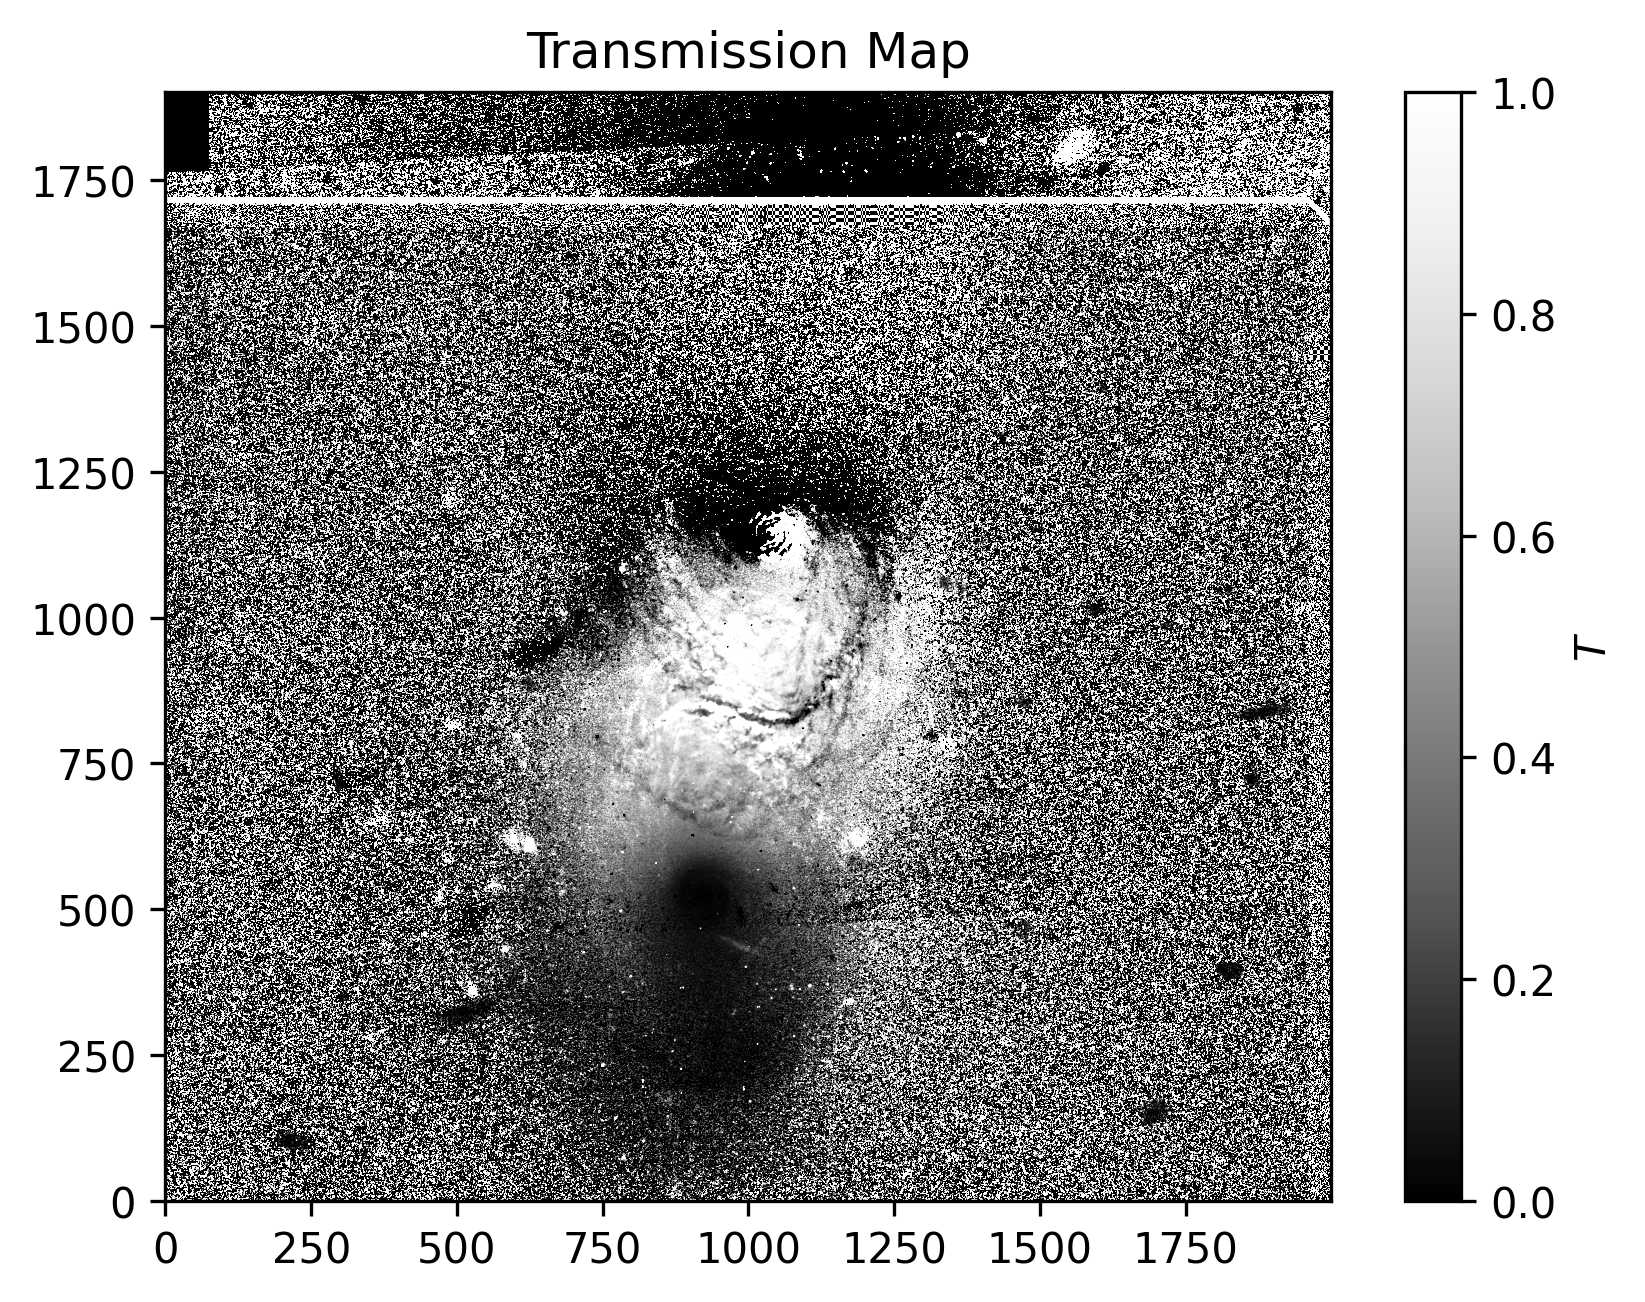

In [26]:
plt.figure(dpi=300)
plt.imshow(trans, origin='lower',vmin=0,vmax=1)
plt.title('Transmission Map')
# plt.xlim(350,650)
# plt.ylim(350,650)
plt.colorbar(label='$T$')
plt.savefig(file+'_transmission_single.png')

## Attenuation Map

c:\Users\dogfi\Documents\Research\OAKS\Python\OverlappingGalaxies\TheOG\rotate_tools.py:748: RuntimeWarning: invalid value encountered in log
  a = -1.086*np.log(data)


KeyboardInterrupt: 

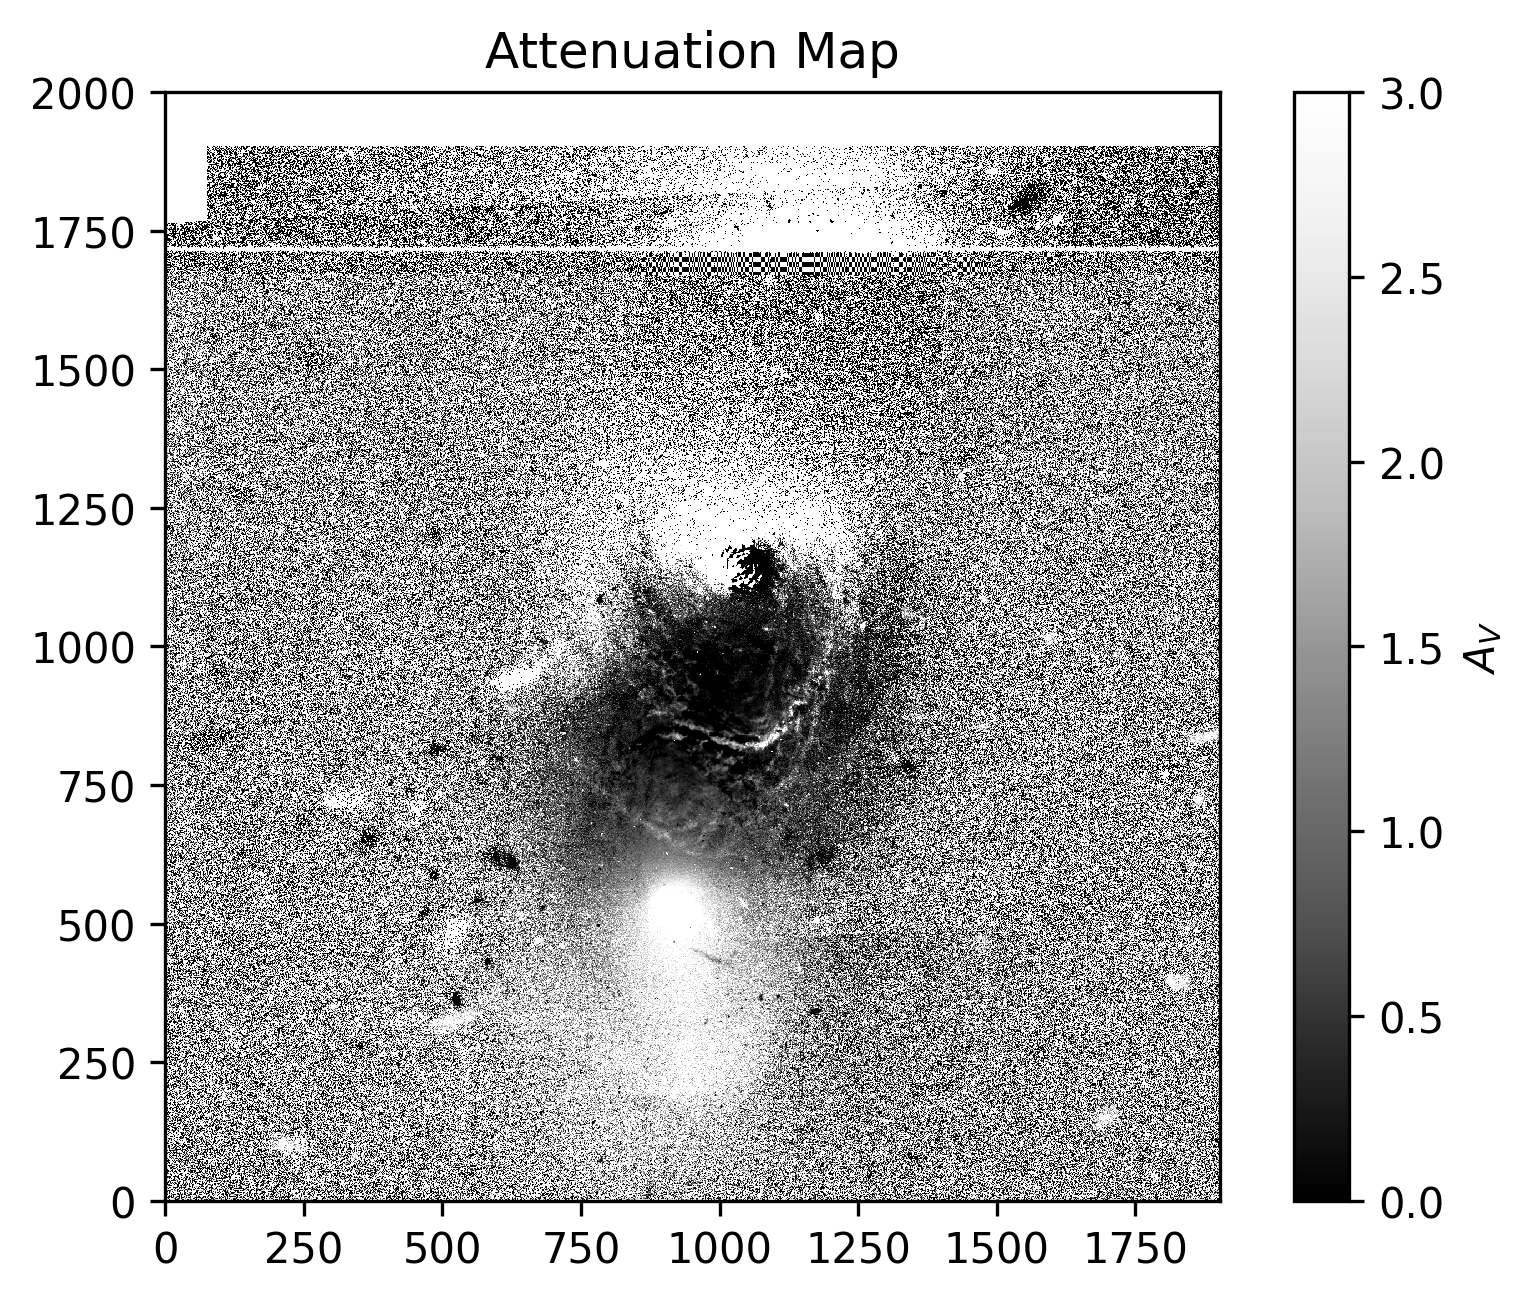

In [27]:
og.attenuation(trans,vmin=0,vmax=3,figname = file+'_attenuation.png')

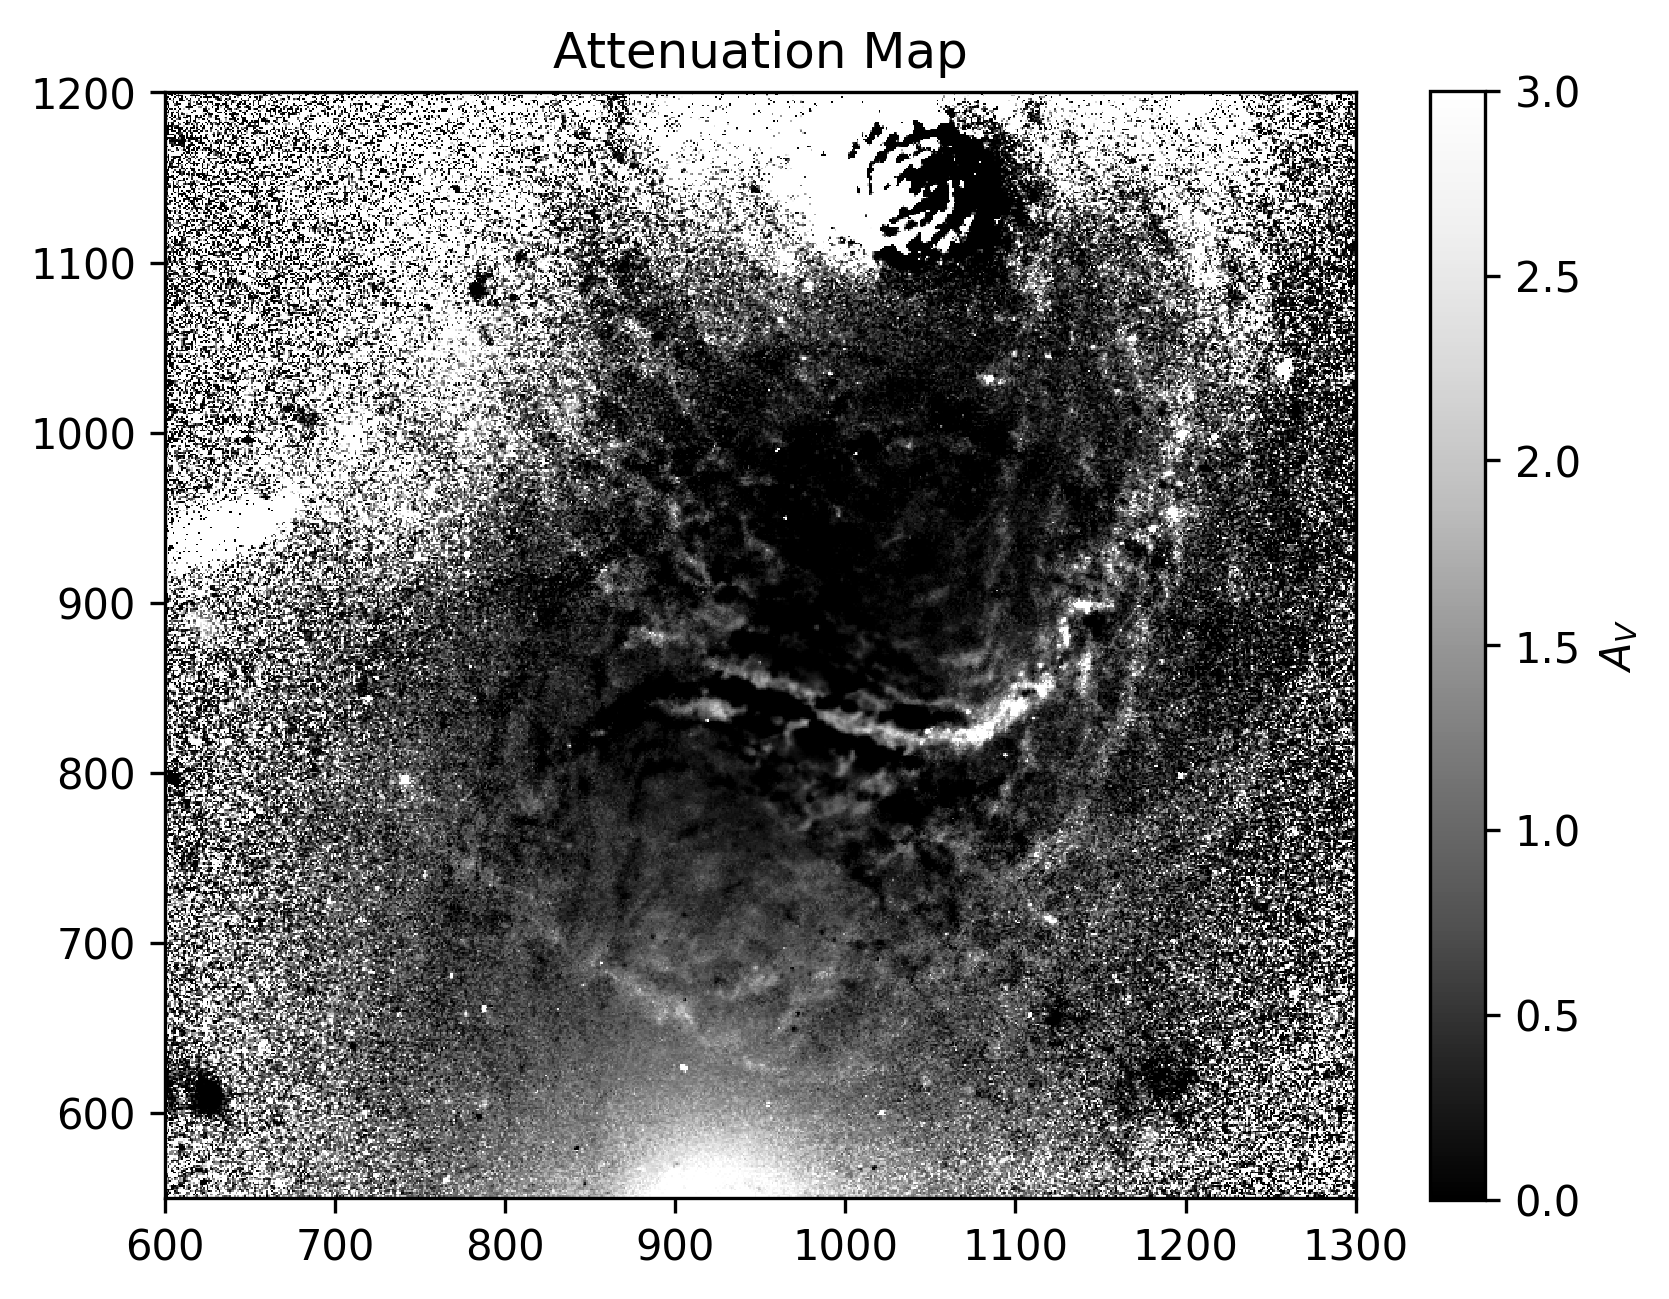

In [ ]:
# A close up
a=og.attenuation(trans,xlim=(600,1300),ylim=(550,1200), figname = file+'_attenuation_single.png')